In [1]:
import numpy as np
import matplotlib.pyplot as plt

DAC Samplerates: 100 kHz, 500 kHz, 1 MHz

## Beispiel-Berechnung THD

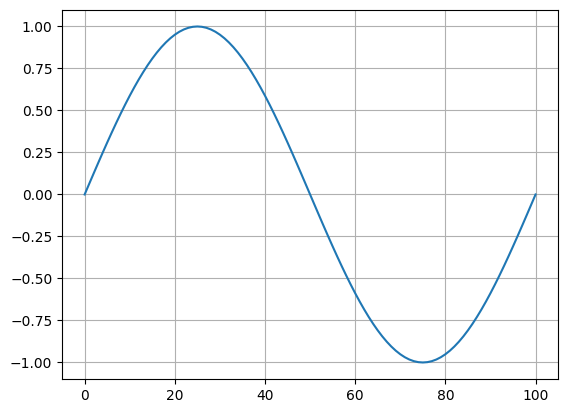

In [2]:
size = 100
x = np.linspace(0, size, size + 1)
y = np.sin(2*np.pi*x / size)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()

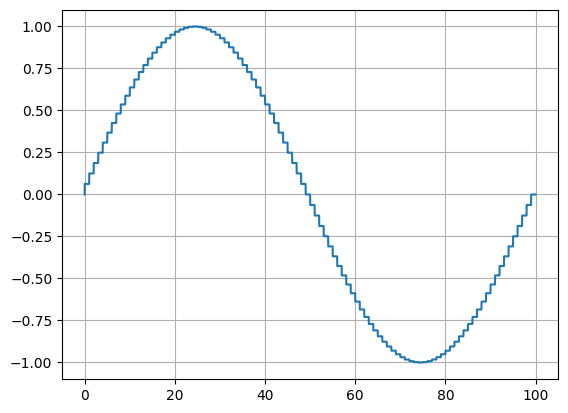

In [3]:
t = np.linspace(0, size, 10_001)
a = y[np.searchsorted(x, t)]

fig, ax = plt.subplots()
ax.plot(t, a)
ax.grid()

In [4]:
A = np.abs(np.fft.rfft(a[:-1]))
THD = np.sum(A[2:]) / A[1]
print(THD)

0.09461819135979006


## THD über Frequenz

Bei sample rates 1 MHz, 500 kHz und 200 kHz

Bis zu 2000 Punkte bei hoher Samplerate, Speicherbedarf bis zu 4 KB

In [5]:
frequencies = np.logspace(2, 4, 200)

In [6]:
def samplerate(frequency):
    if frequency < 250:
        return 200e3
    if frequency < 500:
        return 500e3
    return 1e6

_samplerate = np.frompyfunc(samplerate, 1, 1)

In [7]:
def plot_f(array):
    fig, ax = plt.subplots()
    ax.semilogx(frequencies, array)
    ax.grid()

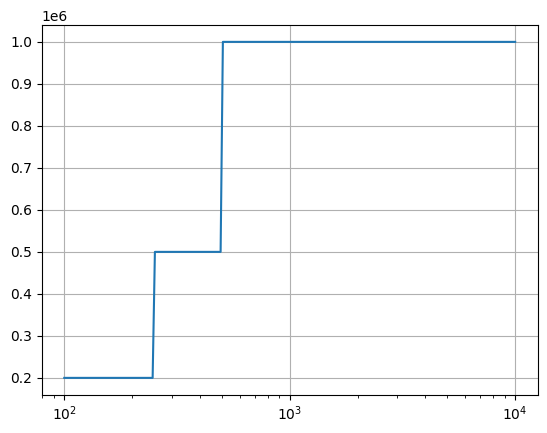

In [8]:
samplerates = _samplerate(frequencies)
plot_f(samplerates)

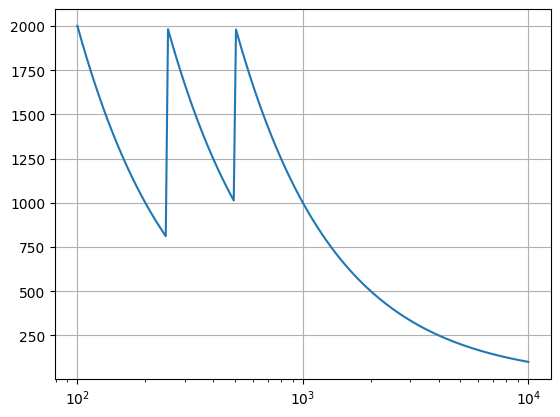

In [9]:
sizes = samplerates / frequencies
plot_f(sizes)

In [10]:
def THD(size):
    size = int(size)
    
    x = np.linspace(0, size, size + 1)
    y = np.sin(2*np.pi*x / size)
    
    t = np.linspace(0, size, 100_001)
    a = y[np.searchsorted(x, t)]
    
    A = np.abs(np.fft.rfft(a[:-1]))
    THD = np.sum(A[2:]) / A[1]
    return THD

_thd = np.frompyfunc(THD, 1, 1)

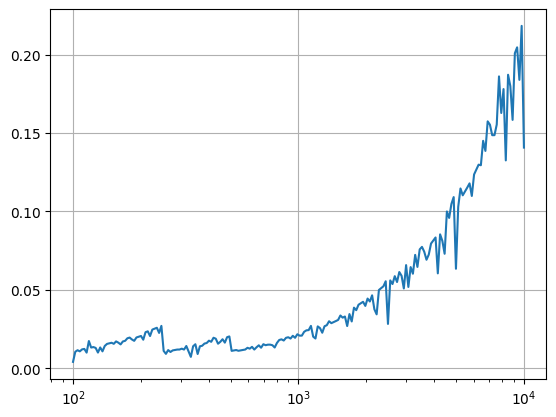

In [11]:
thd_4KB = _thd(sizes)
plot_f(thd_4KB)

## THD über Frequenz, 2 KB

Bei sample rates 1 MHz, 500 kHz, 200 kHz und 100 kHz

Bis zu 1000 Punkte bei hoher Samplerate, Speicherbedarf bis zu 2 KB

In [23]:
def samplerate(frequency):
    if frequency < 200:
        return 100e3
    if frequency < 500:
        return 200e3
    if frequency < 1000:
        return 500e3   
    return 1e6

_samplerate = np.frompyfunc(samplerate, 1, 1)

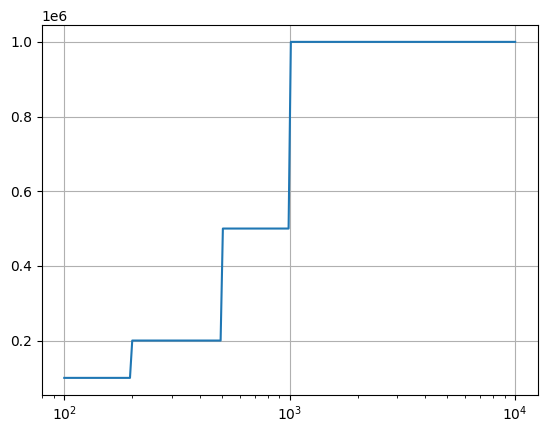

In [24]:
samplerates = _samplerate(frequencies)
plot_f(samplerates)

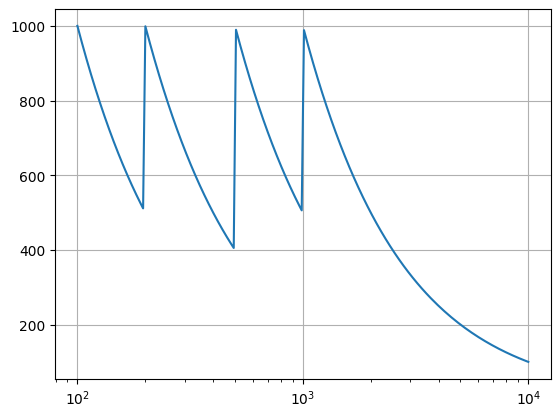

In [25]:
sizes = samplerates / frequencies
plot_f(sizes)

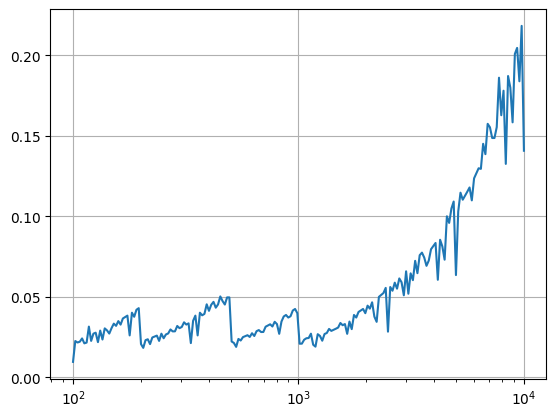

In [27]:
thd_2KB = _thd(sizes)
plot_f(thd_2KB)

In [28]:
print(f"mean THD @ 4 KB = {thd_4KB.mean() * 100:.1f}%")
print(f"mean THD @ 2 KB = {thd_2KB.mean() * 100:.1f}%")

mean THD @ 4 KB = 4.8%
mean THD @ 2 KB = 5.5%


## THD über Frequenz, 2 KB, vereinfacht

Bei sample rates 1 MHz, und 100 kHz

Bis zu 1000 Punkte bei hoher Samplerate, Speicherbedarf bis zu 2 KB

In [29]:
def samplerate(frequency):
    if frequency < 1000:
        return 100e3   
    return 1e6

_samplerate = np.frompyfunc(samplerate, 1, 1)

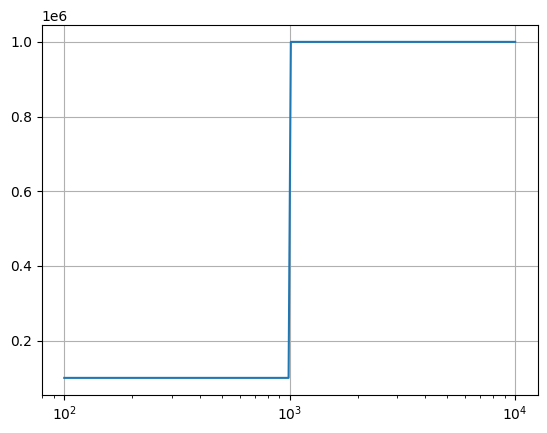

In [30]:
samplerates = _samplerate(frequencies)
plot_f(samplerates)

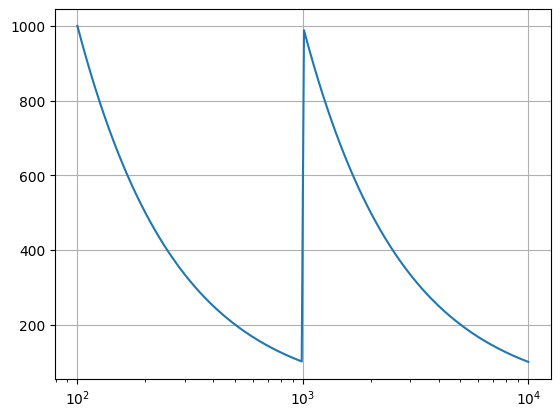

In [31]:
sizes = samplerates / frequencies
plot_f(sizes)

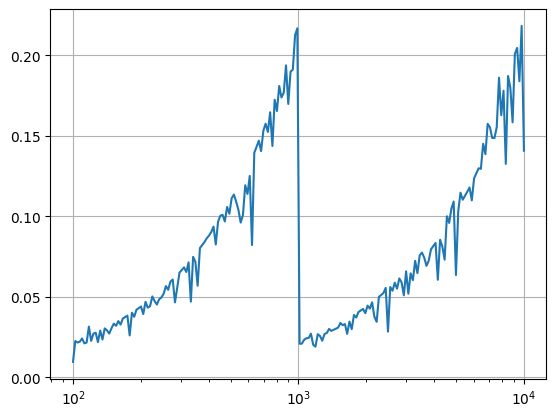

In [32]:
thd_2KB_einfach = _thd(sizes)
plot_f(thd_2KB_einfach)

In [33]:
print(f"mean THD @ 2 KB einfach = {thd_2KB_einfach.mean() * 100:.1f}%")

mean THD @ 2 KB einfach = 8.0%
